# <font color='red'>Issues: covariance matrix which is needed for emcee </font>

In [26]:
# importing packages, functions, etc 
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import corner
import emcee

from scipy.linalg import lstsq
from scipy.optimize import minimize
from scipy.optimize import leastsq
from matplotlib import rcParams
from corner import corner,hist2d
from numpy.linalg import inv, det 

rcParams["savefig.dpi"] = 100

from functions_new_parameters import cov_func
from functions_new_parameters import generate_parallax_signal
from functions_new_parameters import signal_func
from functions_new_parameters import normalized_residuals
# from functions_new_parameters import create_param_time_series
from functions_new_parameters import log_probability
from functions_new_parameters import find_param_from_var
from functions_new_parameters import generate_planet_signal
from functions_new_parameters import thiele_innes

color_palette = sns.color_palette("hls", 8)
color0 = color_palette[5] # darker color (error bars)
color1 = color_palette[4] # lighter color (base line)
color2 = color_palette[7] # dark color (over plotted dashed line)
color3 = color_palette[2] 

rad_mas = 206264806

params = ['alpha', 'delta', 'mu_alpha', 'mu_delta', 'parallax', 'sqrt[cos(i)]cos(Omega)', 'sqrt[cos(i)]sin(Omega)', 'sqrt[e]cos(omega)', 'sqrt[e]sin(omega)' ,'m_planet', 'P_orb', 't_peri']
planet_params = ['e', 'omega', 'Omega', 'cos(i)']
thiele_innes_const = ['B', 'A', 'F', 'G', 'H', 'C']
part2_params = ['alpha', 'delta', 'mu_alpha', 'mu_delta', 'parallax', 'B', 'A', 'F', 'G']

In [27]:
# initial inputs 
np.random.seed(5) 

step_number = 100

times = np.linspace(0, 4.2, 60)

alpha0, delta0 = 1, 0.3

truepars = np.array((0,                      # alpha                                     [rad]
                     0,                      # delta                                     [rad]
                     2.3084641853871365e-07, # proper motion in RA direction  (mu alpha) [rad/year]
                     1.770935480191023e-07,  # proper motion in Dec direction (mu delta) [rad/year]
                     9.699321049402031e-08,  # parallax                                  [rad]
                     0.5348901624946122,     # var1: sqrt(cosi)cos(Omega)                [unitless]
                     0.8330420709110249,     # var2: sqrt(cosi)sin(Omega)                [unitless]
                     -0.18610652302818084,   # var3: sqrt(e)cos(omega)                   [unitless]
                     0.406650171629573,      # var4: sqrt(e)sin(omega)                   [unitless]
                     0.0143188,              # mass of planet                            [solar masses]
                     0.46146592515998475 ,   # orbital period                            [years]
                     0.0))                   # time of pericentre passage                [years]

sigma_err = (1e-5*np.pi/180/60/60)*5*100

In [28]:
# creating true and observed data 
true_ra, true_dec = signal_func(truepars, alpha0, delta0, times)

ra_obs  = true_ra   +  np.random.normal(0, sigma_err, len(true_ra)) 
dec_obs = true_dec  +  np.random.normal(0, sigma_err, len(true_dec)) 

In [29]:
# using leastsq to fit 
guess = truepars * (1 + np.random.uniform(0,0.0001))

best, cov, _ , _ , _ = leastsq(normalized_residuals, guess, args=(alpha0, delta0, sigma_err, ra_obs, dec_obs, times), full_output=1)

best_ra, best_dec = signal_func(best, alpha0, delta0, times)

In [30]:
print(cov)

None


# Printing fitted parameters

### Functions: 
#### - $e, \omega, \Omega, \cos i = $find_param_from_var$(var1, var2, var3, var4)$
#### - $B, A, F, G, H, C = $thiele_innes$(\omega, \Omega, \cos i, \varpi, m\_planet, P\_orb)$

\
$[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11]$\
$[\alpha(0), \delta(1), \mu_{\alpha}(2), \mu_{\delta}(3), \varpi(4), \text{var1}(5), \text{var2}(6), \text{var3} (7),\text{var4}(8),  m\_planet(9), P_{orb}(10), t_{peri}(11)]$

In [31]:
planet_param_best = find_param_from_var(best[5], best[6], best[7], best[8])
thiele_innes_best = thiele_innes(planet_param_best[1], planet_param_best[2], planet_param_best[3], best[4], best[9], best[10])


planet_param_true = find_param_from_var(truepars[5], truepars[6], truepars[7], truepars[8])
thiele_innes_true = thiele_innes(planet_param_true[1], planet_param_true[2], planet_param_true[3], truepars[4], truepars[9], truepars[10])

In [32]:
print("Parameter",12*' ',"Fitted value",3*' ' ,"True value")

print(" ")

j = 0 
for j in range(0, len(best)):
    print(params[j],(22-len(params[j]))*' ','=', best[j], (25-len(str(best[j])))*' ','=', truepars[j])
        
    
print(" ")

for j in range(0, len(planet_params)):
    print(planet_params[j],(22-len(planet_params[j]))*' ','=', planet_param_best[j], (25-len(str(planet_param_best[j])))*' ','=', planet_param_true[j] )
    
    
print(" ")

for j in range(0, len(thiele_innes_const)):
    print(thiele_innes_const[j],(22-len(thiele_innes_const[j]))*' ','=', thiele_innes_best[j], (25-len(str(thiele_innes_best[j])))*' ','=', thiele_innes_true[j])

Parameter              Fitted value     True value
 
alpha                   = 0.34046525191981475        = 0.0
delta                   = 0.0                        = 0.0
mu_alpha                = 2.3264754835245314e-07     = 2.3084641853871365e-07
mu_delta                = 1.773554025717222e-07      = 1.770935480191023e-07
parallax                = 9.66756793428291e-08       = 9.699321049402031e-08
sqrt[cos(i)]cos(Omega)  = 0.51488388393024           = 0.5348901624946122
sqrt[cos(i)]sin(Omega)  = 0.10912356910093608        = 0.8330420709110249
sqrt[e]cos(omega)       = -0.29373236039577555       = -0.18610652302818084
sqrt[e]sin(omega)       = 0.21647279562277483        = 0.406650171629573
m_planet                = 0.024453245114390492       = 0.0143188
P_orb                   = 0.48788602861989006        = 0.46146592515998475
t_peri                  = 0.3638318123284596         = 0.0
 
e                       = 0.13313917078841342        = 0.19999999999999998
omega                   

## Plotting 

Text(0.5, 1.0, 'RA vs Dec')

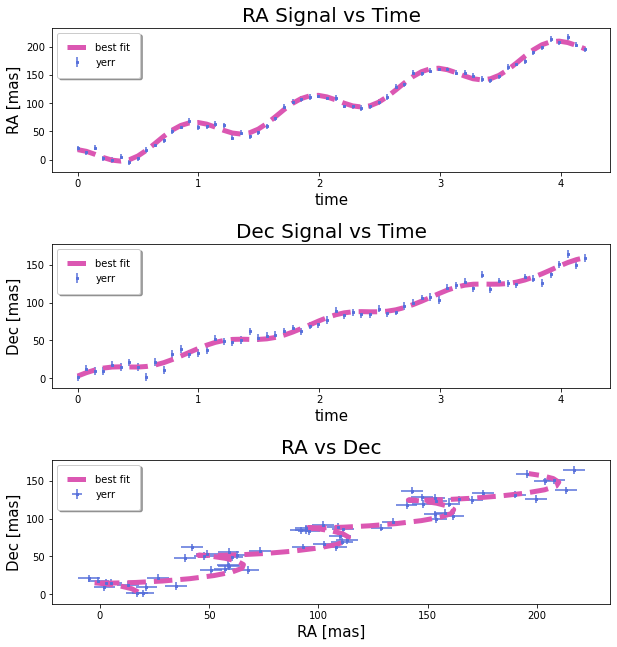

In [33]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex=False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)

ax[0].errorbar(times, ra_obs*rad_mas, yerr=sigma_err*rad_mas, fmt="s", markersize=2,  color=color0, label='yerr')
ax[0].plot(times,     best_ra*rad_mas,  lw=5, color=color2, label='best fit',  ls='--')
ax[0].legend(fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax[0].set_xlabel("time", fontsize = 15)
ax[0].set_ylabel("RA [mas]", fontsize = 15)
ax[0].set_title("RA Signal vs Time", fontsize = 20)

ax[1].errorbar(times, dec_obs*rad_mas, yerr=sigma_err*rad_mas, fmt="s", markersize=2,  color=color0, label='yerr')
ax[1].plot(times,     best_dec*rad_mas,  lw=5, color=color2, label='best fit',  ls='--')
ax[1].legend(fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax[1].set_xlabel("time", fontsize = 15)
ax[1].set_ylabel("Dec [mas]", fontsize = 15)
ax[1].set_title("Dec Signal vs Time", fontsize = 20)

ax[2].errorbar(ra_obs*rad_mas, dec_obs*rad_mas, yerr=sigma_err*rad_mas, xerr = sigma_err*rad_mas, fmt="s", markersize=2,  color=color0, label='yerr')
ax[2].plot(best_ra*rad_mas,  best_dec*rad_mas,  lw=5, color=color2, label='best fit' , ls='--')
ax[2].legend(fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax[2].set_xlabel("RA [mas]",  fontsize = 15)
ax[2].set_ylabel("Dec [mas]", fontsize = 15)
ax[2].set_title("RA vs Dec",  fontsize = 20)

# emcee

In [34]:
pos = np.random.multivariate_normal(best, cov, size=100)
for p in pos:
    test_ra, test_dec = signal_func(p, alpha0, delta0, times)
    plt.plot(test_ra*rad_mas, test_dec*rad_mas,alpha=0.15,color='gray')
plt.plot(true_ra*rad_mas, true_dec*rad_mas, ls='--', color='red')
plt.errorbar(ra_obs*rad_mas, dec_obs*rad_mas, yerr=sigma_err*rad_mas, xerr = sigma_err*rad_mas, fmt="s", markersize=2,  color=color0, label='yerr')

ValueError: cov must be 2 dimensional and square

In [ ]:
pos = np.random.multivariate_normal(best, cov, size=100_000) #100_000

In [ ]:
f = lambda pars: log_probability(pars,alpha0,)
minimize

In [ ]:
step_number = 1000
pos_part2 = np.random.multivariate_normal(best, cov, size=100) 
nwalkers, ndim = pos_part2.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args = (alpha0, delta0, ra_obs, dec_obs, sigma_err, times))
sampler.run_mcmc(pos_part2, step_number, progress = True);

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

import corner
fig = corner.corner(flat_samples, 
                    labels=params, 
                    truths=truepars, 
                    truth_color='limegreen', 
                    plot_density=False,
                    plot_datapoints=False,
                    levels=[0.68,0.95,0.99],
                    color='dodgerblue',hist_kwargs={"density":True});

corner.corner(pos, 
              labels=params, 
              truths=truepars, 
              truth_color='limegreen',
              plot_density=False,
              plot_datapoints=False,
              levels=[0.68,0.95,0.99],
              color='red',
              fig=fig,hist_kwargs={"density":True});

print("blue = emcee")

plt.show()